In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_theme(style="dark")
# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

In [3]:
df=pd.read_csv("../data/datos_empleados.csv", index_col=0)
df.head(5)

,employee_number,age,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years
0,1,51,No,desconocido,desconocido,bachillerato,desconocido,1,male,3,5,research_director,3,desconocido,6462,7,No,13,3.0,3,0,5,3,20,15,15,1972,yes,51,684.0,6.0,19537.0,6
1,2,52,No,desconocido,desconocido,universidad,life_sciences,3,male,2,5,manager,3,desconocido,5678,0,desconocido,14,3.0,1,1,5,3,33,11,9,1971,yes,65,699.0,1.0,19999.0,34
2,3,42,No,travel_rarely,research_development,fp,technical_degree,3,male,3,5,manager,4,married,4933,1,No,11,3.0,4,0,3,3,22,11,15,1981,yes,58,532.0,4.0,19232.0,22
3,4,47,No,travel_rarely,desconocido,universidad,medical,1,female,3,4,research_director,3,married,26703,3,desconocido,19,3.0,2,2,2,3,20,5,6,1976,no,82,359.0,2.0,17169.0,5
4,5,46,No,desconocido,desconocido,bachillerato,technical_degree,1,female,4,4,sales_executive,1,divorced,7739,2,No,12,3.0,4,1,5,3,19,2,8,1977,no,45,1319.0,3.0,5361.8,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   employee_number             1510 non-null   int64  
 1   age                         1510 non-null   int64  
 2   attrition                   1510 non-null   object 
 3   business_travel             1510 non-null   object 
 4   department                  1510 non-null   object 
 5   education                   1510 non-null   object 
 6   education_field             1510 non-null   object 
 7   environment_satisfaction    1510 non-null   int64  
 8   gender                      1510 non-null   object 
 9   job_involvement             1510 non-null   int64  
 10  job_level                   1510 non-null   int64  
 11  job_role                    1510 non-null   object 
 12  job_satisfaction            1510 non-null   int64  
 13  marital_status              1510 non-n

POSIBLES GRÁFICAS:

Histograma: la edad de los empleados, la distancia a casa, monthy_rate, num_companies_worked

Countplot: 



In [5]:
colu_numericas =df.select_dtypes (include= [int, float])
colu_numericas

,employee_number,age,environment_satisfaction,job_involvement,job_level,job_satisfaction,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years
0,1,51,1,3,5,3,6462,7,13,3.0,3,0,5,3,20,15,15,1972,51,684.0,6.0,19537.0,6
1,2,52,3,2,5,3,5678,0,14,3.0,1,1,5,3,33,11,9,1971,65,699.0,1.0,19999.0,34
2,3,42,3,3,5,4,4933,1,11,3.0,4,0,3,3,22,11,15,1981,58,532.0,4.0,19232.0,22
3,4,47,1,3,4,3,26703,3,19,3.0,2,2,2,3,20,5,6,1976,82,359.0,2.0,17169.0,5
4,5,46,1,4,4,1,7739,2,12,3.0,4,1,5,3,19,2,8,1977,45,1319.0,3.0,5361.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1506,36,3,2,3,4,5518,1,11,3.0,1,1,6,3,16,3,7,1987,51,530.0,3.0,10325.0,11
1610,1507,45,3,3,2,2,23163,1,12,3.0,2,0,5,2,9,0,8,1978,57,805.0,4.0,4447.0,8
1611,1508,39,1,4,3,3,2560,0,18,3.0,4,0,3,3,8,0,7,1984,41,903.0,10.6,7159.4,9
1612,1509,36,1,3,2,4,25952,4,13,3.0,4,2,3,3,7,0,7,1987,84,1229.0,8.0,5308.8,12


In [6]:

col_valoraciones = ["environment_satisfaction", "job_involvement", "job_satisfaction", "performance_rating", "relationship_satisfaction", "work_life_balance"]

In [7]:
colu_hist=[i for i in list(colu_numericas) if i not in col_valoraciones]
colu_hist
### hacer histograma de estas columnas. En lugar de countplot es un hist.

['employee_number',
 'age',
 'job_level',
 'monthly_rate',
 'num_companies_worked',
 'percent_salary_hike',
 'stock_option_level',
 'training_times_last_year',
 'years_at_company',
 'years_since_last_promotion',
 'years_with_curr_manager',
 'date_birth',
 'hourly_rate',
 'daily_rate',
 'distance_from_home',
 'monthly_income',
 'total_working_years']

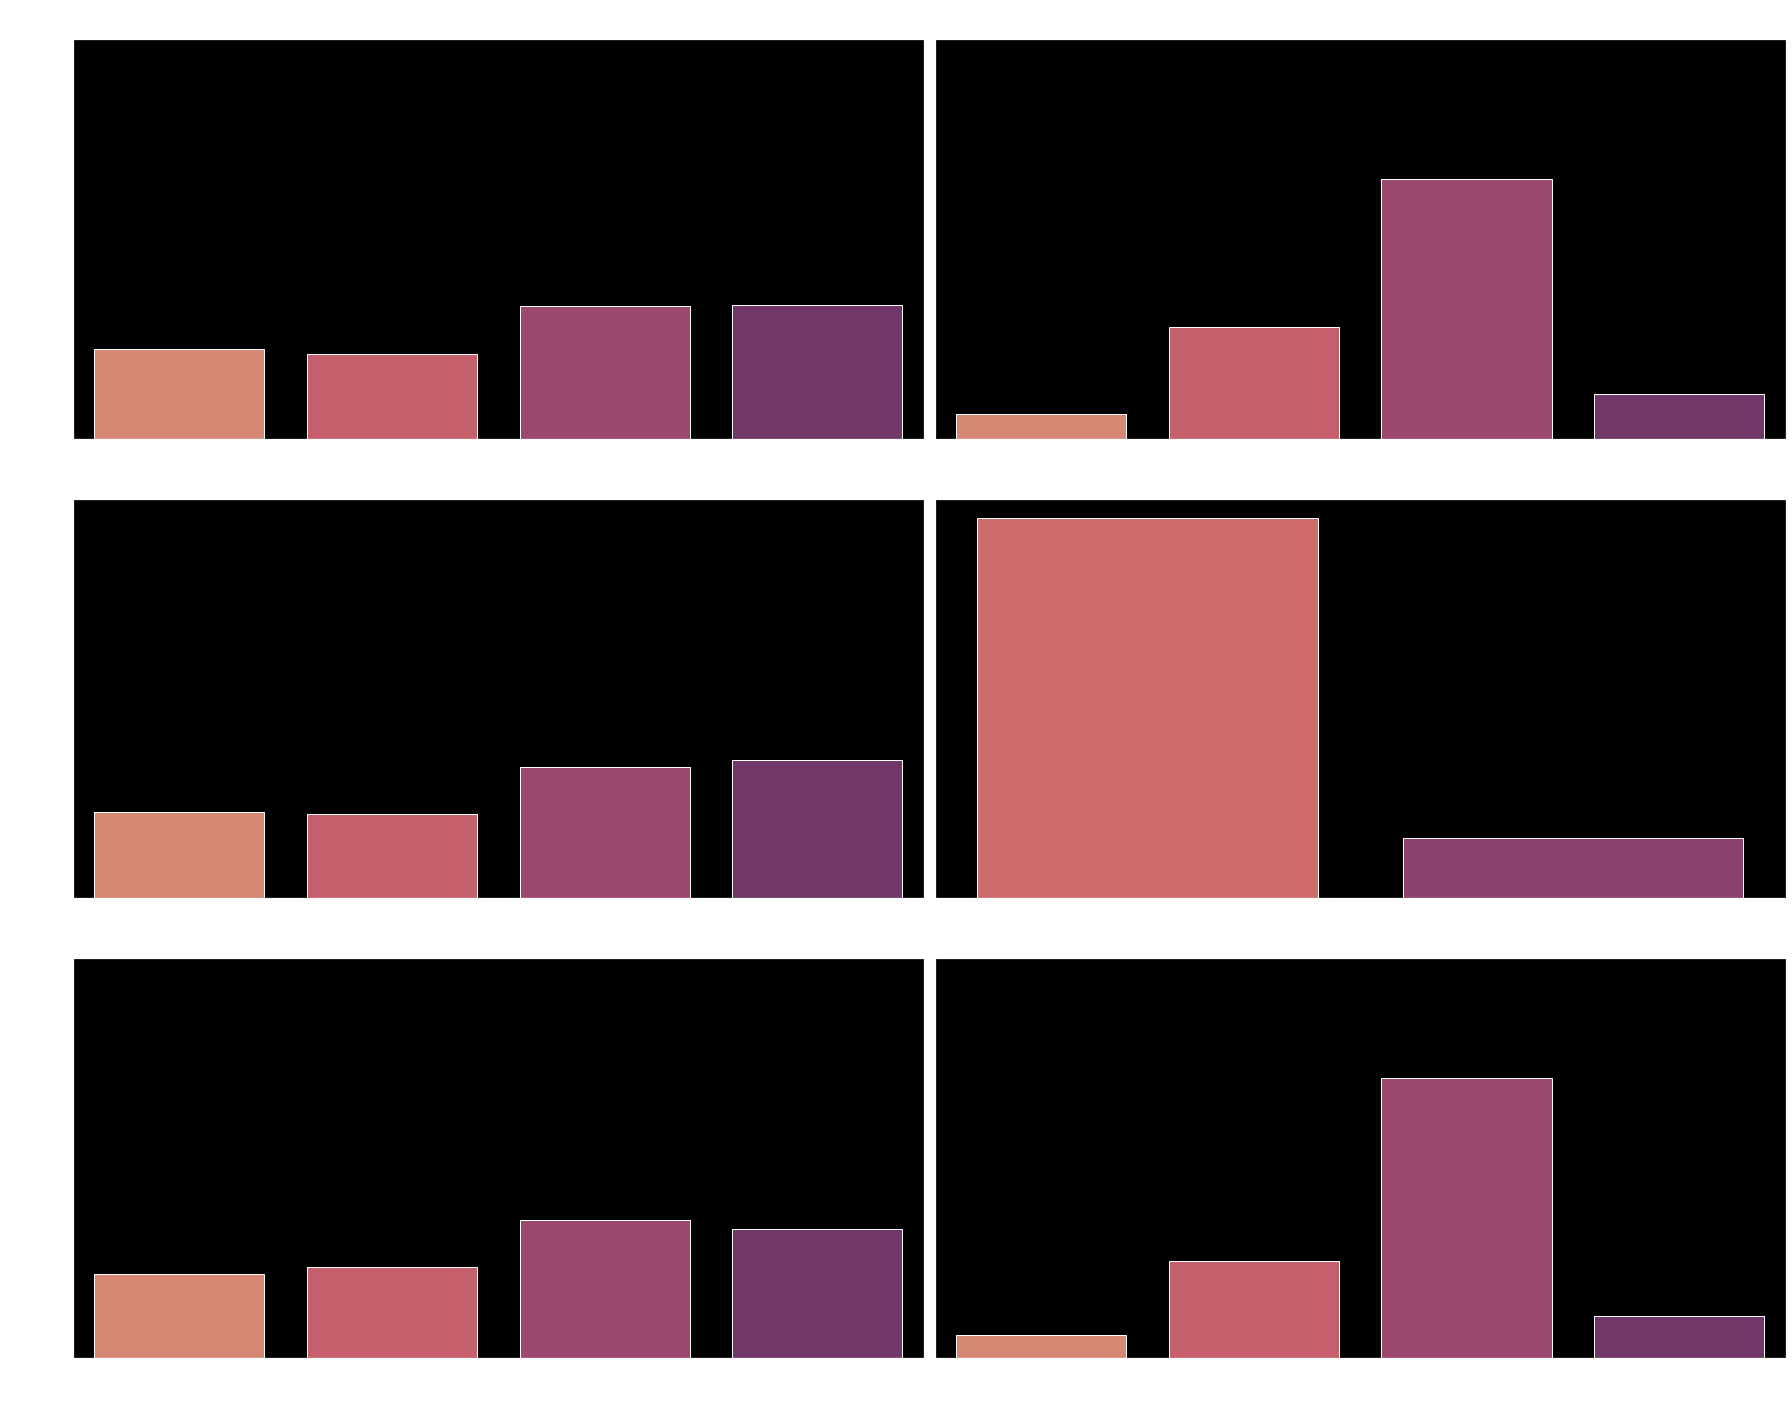

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20), sharey=True)
axes=axes.flat
for indice, col in enumerate (col_valoraciones):
    sns.countplot(x=col, data=df, ax=axes[indice], palette='flare')
        
# Etiquetas y título
plt.suptitle('Valoraciones', fontsize=40)

axes[0].set_xlabel("Satisfacción con el entorno de trabajo", fontsize=25)
axes[0].set_ylabel("Número de valoraciones", fontsize=25)

axes[1].set_xlabel("Implicación del empleado en el trabajo", fontsize=25)
axes[1].set_ylabel("Número de valoraciones", fontsize=25)

axes[2].set_xlabel("Satisfacción del empleado con el trabajo", fontsize=25)
axes[2].set_ylabel("Número de valoraciones", fontsize=25)

axes[3].set_xlabel("Calificación del rendimiento del empleado", fontsize=25)
axes[3].set_ylabel("Número de valoraciones", fontsize=25)

axes[4].set_xlabel("Satisfacción con las relaciones interpersonales del empleado", fontsize=25)
axes[4].set_ylabel("Número de valoraciones", fontsize=25)

axes[5].set_xlabel("Equilibrio entre el trabajo y la vida personal del empleado", fontsize=25)
axes[5].set_ylabel("Número de valoraciones", fontsize=25)

plt.tight_layout();

In [9]:
len(colu_numericas.columns)

23

In [10]:
colu_categoricas =df.select_dtypes (include= ["object"])
colu_categoricas

,attrition,business_travel,department,education,education_field,gender,job_role,marital_status,overtime,remote_work
0,No,desconocido,desconocido,bachillerato,desconocido,male,research_director,desconocido,No,yes
1,No,desconocido,desconocido,universidad,life_sciences,male,manager,desconocido,desconocido,yes
2,No,travel_rarely,research_development,fp,technical_degree,male,manager,married,No,yes
3,No,travel_rarely,desconocido,universidad,medical,female,research_director,married,desconocido,no
4,No,desconocido,desconocido,bachillerato,technical_degree,female,sales_executive,divorced,No,no
...,...,...,...,...,...,...,...,...,...,...
1609,Yes,travel_rarely,desconocido,eso,life_sciences,male,sales_executive,married,desconocido,no
1610,No,non_travel,desconocido,fp,desconocido,male,laboratory_technician,desconocido,desconocido,yes
1611,No,travel_rarely,desconocido,doctorado,desconocido,male,sales_executive,single,No,yes
1612,No,non_travel,desconocido,universidad,technical_degree,male,sales_executive,divorced,No,yes


employee_number (PK,FK)

Tabla de datos personales: employee_number (PK, FK), age, date_birth, gender, marital_status,distance_from_home, num_companies_worked, total_working_years, education, education_field,

Tabla de valoraciones: employee_number (PK, FK), environment_satisfaction, job_involvement, job_satisfaction, performance_rating, relationship_satisfaction, work_life_balance

Tabla de salarios:employee_number (PK, FK), monthly_rate, percent_salary_hike, hourly_rate, daily_rate, monthly_income

Gestión interna de la empresa: employee_number (PK, FK),attrition, business_travel, department, job_level, job_role, overtime, stock_option_level, training_times_last_year, years_at_company, years_since_last_promotion, years_with_curr_manager, remote_work




NUEVA GRÁFICA UN HISTPLOT DE LAS ANTERIORES GRÁFICAS

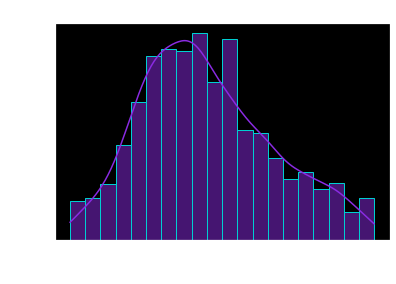

In [11]:
# Aquí calculo la edad media por empleado en este caso creando un histograma.

sns.histplot(df['age'], bins=20, color='blueviolet', edgecolor='darkturquoise', kde = True)

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Número de empleados')
plt.title('Distribución de la edad de los empleados');


In [12]:
df ["age"].mean()   ###para comprobar que la gráfica está bien, saqué la media matemática.

36.92781456953642

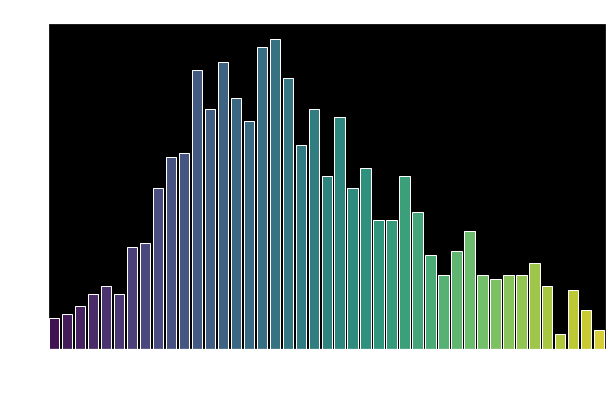

In [13]:
# Los mismo que antes (calcular la edad media de empleados) pero ahora con un countplot.

df['Edad Media'] = df['age']

plt.figure(figsize=(10, 6))
sns.countplot(x='Edad Media', data=df, palette='viridis')

# Etiquetas y título
plt.xlabel('Edad Media')
plt.ylabel('Número de Empleados')
plt.title('Distribución de Edad Media de Empleados')

# Muestra el countplot
plt.show()

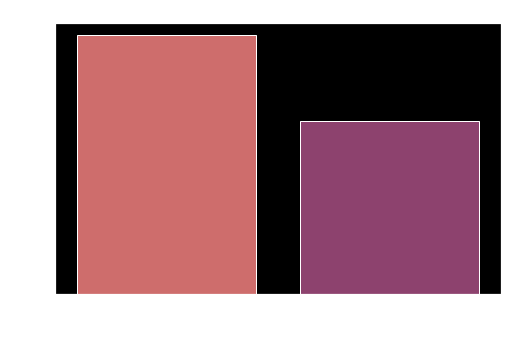

In [14]:
#Para calcular la distribución de empleados según el género.

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='flare')

# Etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de empleados')
plt.title('Distribución de género de empleados')

plt.show()

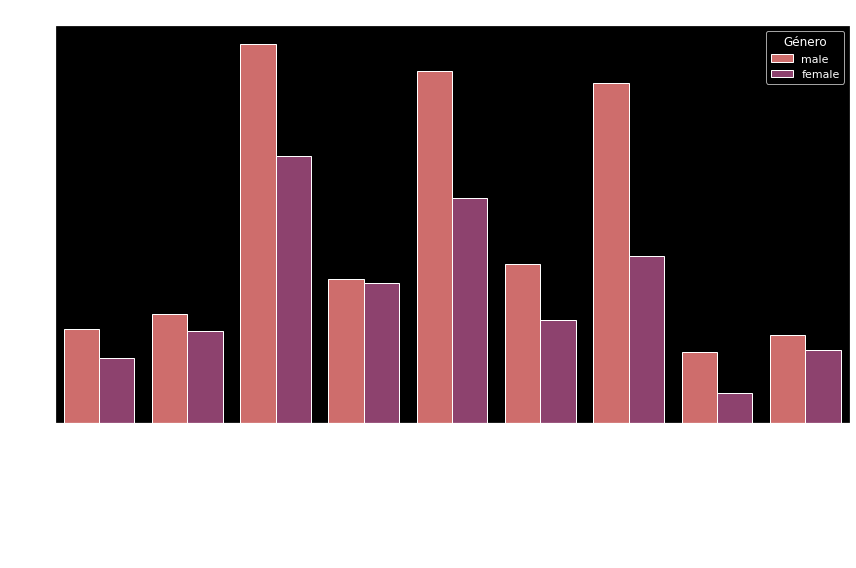

In [15]:
# Este gráfico de barras muestra la relación entre género ('gender')y puesto de trabajo a desempeñar ('job_role')

# Crea un gráfico de barras para ver la realción género y puesto de trabajo'gender' y 'job_role'
plt.figure(figsize=(12, 8))
sns.countplot(x='job_role', hue='gender', data=df, palette='flare')

# Ajusta las etiquetas y título
plt.xlabel('Puesto de trabajo')
plt.ylabel('Número de empleados')
plt.title('Relación entre género y puesto de trabajo', fontsize=15)

plt.legend(title='Género')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

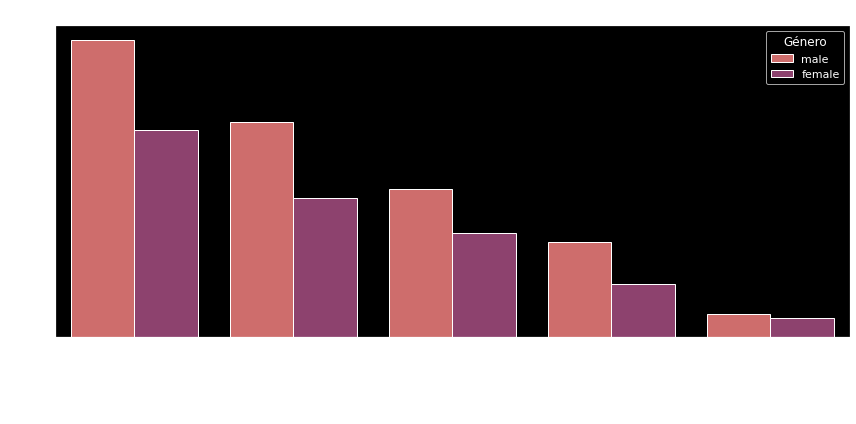

In [16]:
#Relación entre género y educación.
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='gender', data=df, palette='flare')

# Etiquetas y título
plt.xlabel('Nivel de educación')
plt.ylabel('Número de empleados')
plt.title('Relación entre nivel de educación y género', fontsize=15)


plt.legend(title='Género')


plt.xticks(rotation=45, ha='right')
plt.tight_layout();

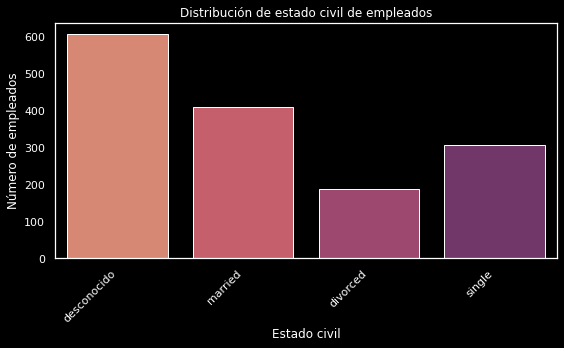

In [24]:
# Nos muestra a grandes rasgos el estado civil de los empleados.

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_theme(style="dark")
# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

plt.figure(figsize=(8, 5))
sns.countplot(x='marital_status', data=df, palette='flare')

# Ajusta las etiquetas y título
plt.xlabel('Estado civil')
plt.ylabel('Número de empleados')
plt.title('Distribución de estado civil de empleados')

# Muestra el countplot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

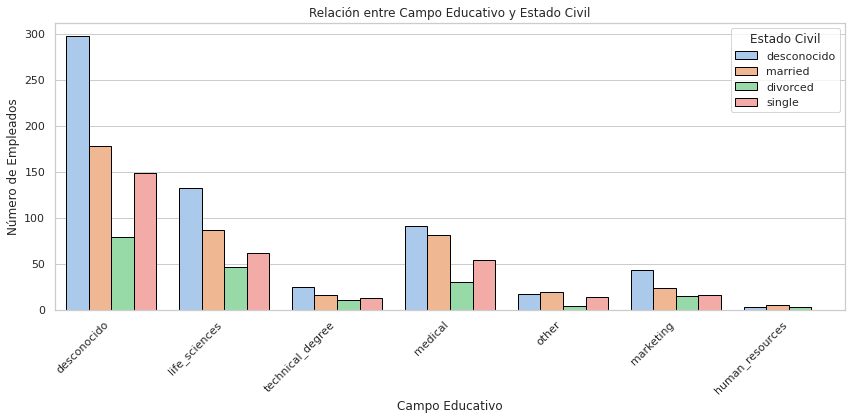

In [18]:
#Ver la relación entre el estado civil del empleado y el campo educativo al que pertenece,

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='education_field', hue='marital_status', data=df, palette='pastel', edgecolor='black')

# Etiquetas y título
plt.xlabel('Campo Educativo')
plt.ylabel('Número de Empleados')
plt.title('Relación entre Campo Educativo y Estado Civil')


plt.legend(title='Estado Civil')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total de Años Trabajados')

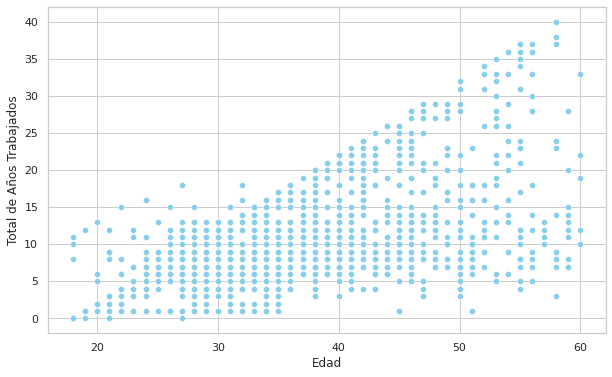

In [19]:
#Relación entre la edad y el número de años trabajados.

df_filtered = df[['total_working_years', 'age']].dropna()

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_working_years', data=df_filtered, color='skyblue')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Total de Años Trabajados')

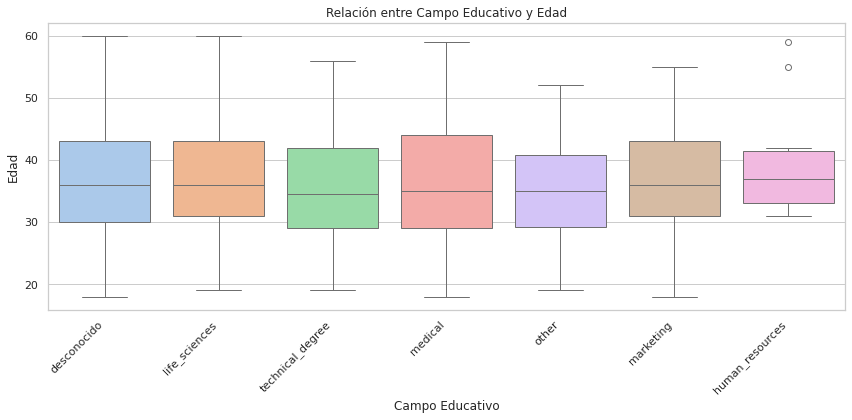

In [20]:
# Relación entre la edad y el campo educativo al que pertenece.
sns.set(style="whitegrid")

# Crea un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_field', y='age', data=df, palette='pastel')

# Ajusta las etiquetas y título
plt.xlabel('Campo Educativo')
plt.ylabel('Edad')
plt.title('Relación entre Campo Educativo y Edad')

# Muestra el boxplot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

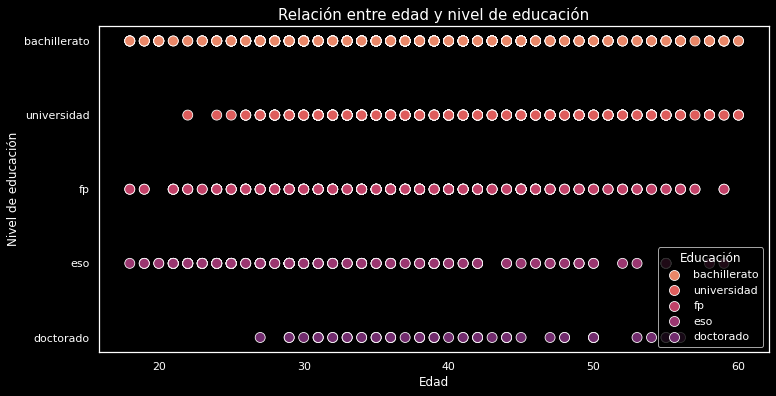

In [27]:
# Relación entre la edad y el nivel de educación

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_theme(style="dark")
# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='education', hue='education', data=df, palette='flare', s=100)

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Nivel de educación')
plt.title('Relación entre edad y nivel de educación', fontsize=15)


plt.legend(title='Educación')

plt.show()

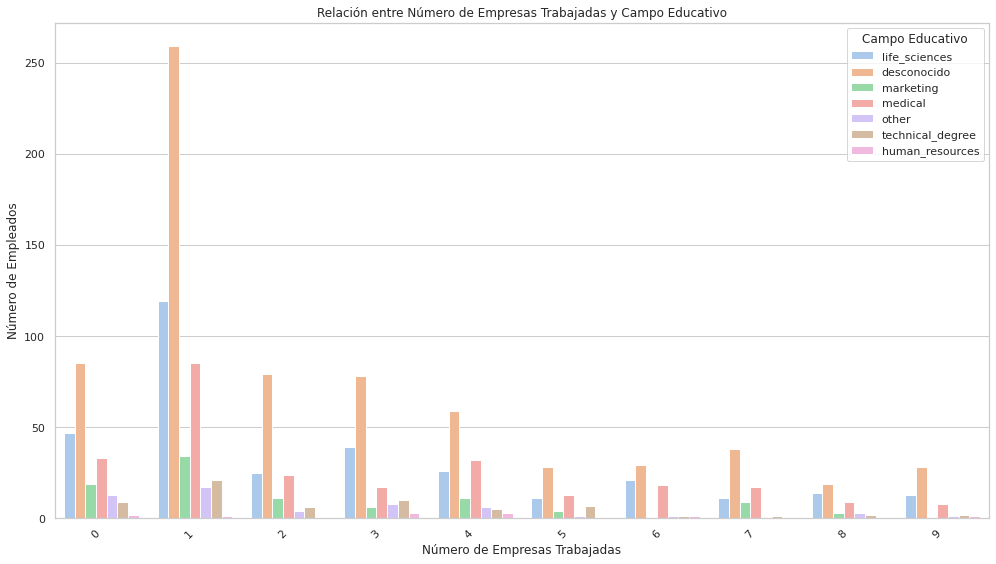

In [22]:
#Relación entre número de empresas trabajadas y el campo educativo

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un countplot para 'num_companies_worked' con colores diferenciados por 'education_field'
plt.figure(figsize=(14, 8))
sns.countplot(x='num_companies_worked', hue='education_field', data=df, palette='pastel')

# Ajusta las etiquetas y título
plt.xlabel('Número de Empresas Trabajadas')
plt.ylabel('Número de Empleados')
plt.title('Relación entre Número de Empresas Trabajadas y Campo Educativo')

# Ajusta la leyenda
plt.legend(title='Campo Educativo')

# Muestra el countplot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

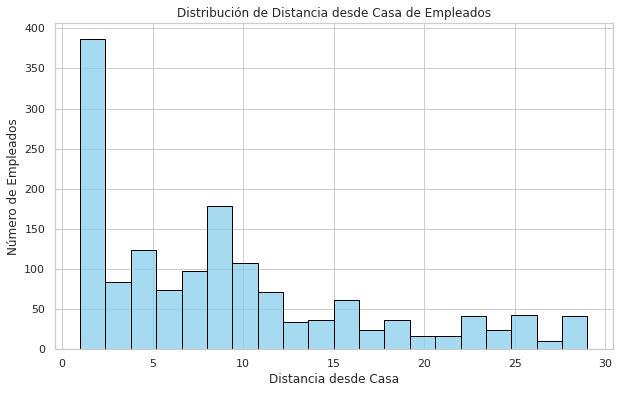

In [23]:
#Muestra la distacia del trabajo desde casa. ##Esta tabla no me convence#

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['distance_from_home'], bins=20, kde=False, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Distancia desde Casa')
plt.ylabel('Número de Empleados')
plt.title('Distribución de Distancia desde Casa de Empleados')

# Muestra el histograma
plt.show()